# Quantitative and qualitative analysis of the project

This notebook contains both quantitative and visual analysis with comments for the project.

**There is also a short explanations of the results with my hypotheses on the success, failues and limiations of this project at the end of the document**.

Requirements to re-use the notebook:
- Predictions and GT data
- Dice and Relative volume error (in %) for all datasets to analyse in a csv with the same format as this example:
    
        Model trained on...,Mean Dice (ideal 1),Std,Relative Volume Error (ideal 0),Std

        model1,0.77,0.061,23.656,17.92

        model2,0.409,0.053,114.437,38.122

        model3,0.027,0.046,4.913,40.734

        model4,0.264,0.191,-80.887,17.84

        model5,0.85,0.074,-21.882,11.34

## Lets start by importing our required libraries and data!

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.patches as mpatches


### Import data csv for our unseen dataset

Here, we will start with our Basel dataset since the main goal of this project is to see if our aggregated dataset-trained model generalizes better than specialized models.

In [3]:
data_df = pd.read_csv("data/data_brainhack_2023 - basel.csv")
data_df.head()

,Model trained on...,Mean Dice (ideal 1),Std,Relative Volume Error (ideal 0),Std.1
0,Spine Generic,0.770,0.061,23.656,17.920
1,Inspired,0.409,0.053,114.437,38.122
2,Canproco,0.027,0.046,4.913,40.734
3,sci-colorado,0.264,0.191,-80.887,17.840
4,All Aggregated,0.850,0.074,-21.882,11.340


In [4]:
data_df_sorted = data_df.sort_values(['Mean Dice (ideal 1)'])
data_df_sorted

,Model trained on...,Mean Dice (ideal 1),Std,Relative Volume Error (ideal 0),Std.1
2,Canproco,0.027,0.046,4.913,40.734
3,sci-colorado,0.264,0.191,-80.887,17.840
1,Inspired,0.409,0.053,114.437,38.122
0,Spine Generic,0.770,0.061,23.656,17.920
4,All Aggregated,0.850,0.074,-21.882,11.340


We can already see that the Dice is really good for the aggregated dataset (row 4) compared to other models trained on the individual datasets! Let's plot it.

## Plotting our quantitative results

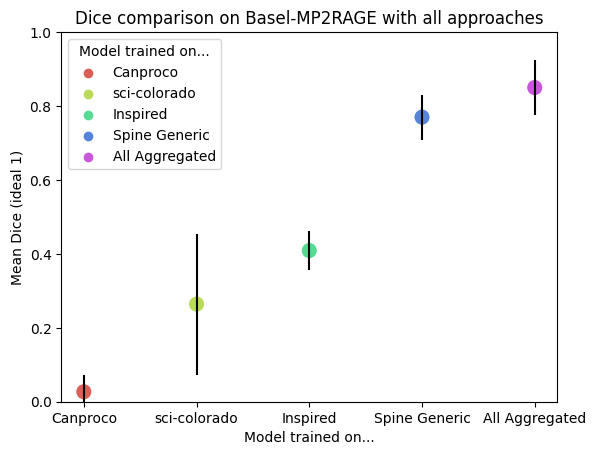

In [12]:
# Here, we will focus on the dice metric...


ax = sns.scatterplot(data=data_df_sorted,x='Model trained on...', y='Mean Dice (ideal 1)', hue='Model trained on...',hue_order=['Canproco','sci-colorado','Inspired','Spine Generic','All Aggregated'], palette='hls',s=140)
ax.errorbar(data=data_df_sorted,x='Model trained on...', y='Mean Dice (ideal 1)', yerr="Std", fmt="none", c='k')
ax.set(title='Dice comparison on Basel-MP2RAGE with all approaches')
ax.set_ylim(top=1,bottom=0)
plt.show()


Now it is clear the, with this test, the aggregated dataset model successfully generalized better than the other specific models to a new and unseen dataset and contrast (mp2rage)!

### Second external dataset experiment with Rohan's fMRI test set...

Here, we did the same thing testing all our existing trained models on a new dataset with the BOLD contrast and EPI images, reporting the dice metric.

In [13]:
data_df_fmri = pd.read_csv("data/data_brainhack_2023 - fmri.csv")
data_df_fmri.head()
data_df_fmri_sorted = data_df_fmri.sort_values(['Mean Dice (ideal 1)'])
data_df_fmri_sorted

,Model trained on...,Mean Dice (ideal 1),Std
2,Canproco,0.055,0.054
1,Inspired,0.140,0.136
3,sci-colorado,0.884,0.058
0,Spine Generic,0.891,0.029
4,All Aggregated,0.903,0.020


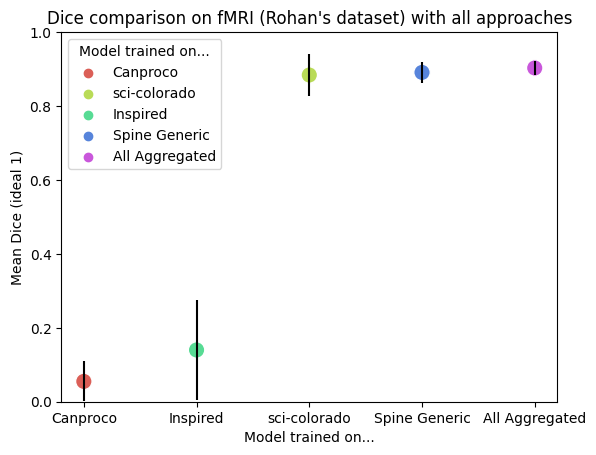

In [14]:
ax = sns.scatterplot(data=data_df_fmri_sorted,x='Model trained on...', y='Mean Dice (ideal 1)', hue='Model trained on...',hue_order=['Canproco','sci-colorado','Inspired','Spine Generic','All Aggregated'], palette='hls',s=140)
ax.errorbar(data=data_df_fmri_sorted,x='Model trained on...', y='Mean Dice (ideal 1)', yerr="Std", fmt="none", c='k')
ax.set(title='Dice comparison on fMRI (Rohan\'s dataset) with all approaches')
ax.set_ylim(top=1,bottom=0)
plt.show()

We can see here as well that the "all aggregated" dataset is able to generalize (slightly) better! 

Let's look at how well the aggregated dataset performs against the respective specific models on their own territory (the test set of the dataset they were trained on).

## Plotting a comparison with the specific models
Here, the data should be formatted like this:

        Model trained on...,Dataset tested	Dice Original Dataset	Std	Dice Aggregated Datasets	Std.1

        model1,0.77,0.061,0.77,0.061

        model2,0.409,0.053,0.409,0.053

        model3,0.027,0.046,0.027,0.046

        model4,0.264,0.191,0.264,0.191

        model5,0.85,0.074,0.85,0.074

In [6]:
data_df_compare = pd.read_csv("data/data_brainhack_2023 - comparison.csv")
data_df_compare.head()

,Dataset tested,Dice Original Dataset,Std,Dice Aggregated Datasets,Std.1
0,Spine Generic,0.962,0.019,0.958,0.039
1,Inspired,0.990,0.003,0.973,0.006
2,Canproco,0.842,0.101,0.950,0.030
3,sci-colorado,0.936,0.024,0.931,0.022


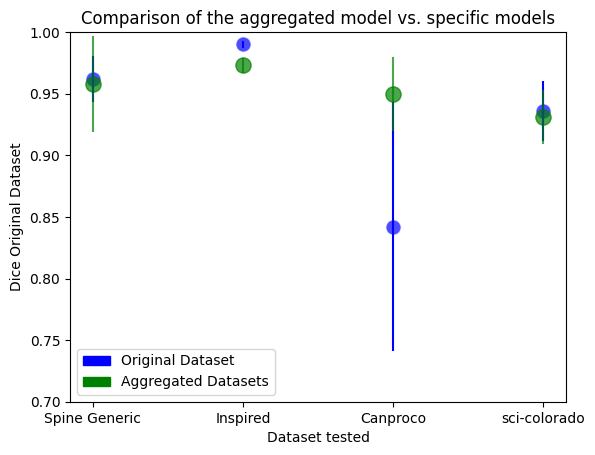

In [16]:
ax2 = sns.scatterplot(data=data_df_compare,x='Dataset tested', y='Dice Original Dataset', c='b',s=120, alpha=0.7)
ax2.errorbar(data=data_df_compare,x='Dataset tested', y='Dice Original Dataset', yerr="Std", fmt="none", c='b', alpha=1)


plt.scatter(data=data_df_compare,x='Dataset tested', y='Dice Aggregated Datasets',s=120, c='g', alpha=0.7)
ax2.errorbar(data=data_df_compare,x='Dataset tested', y='Dice Aggregated Datasets', yerr="Std.1", fmt="none", c='g', alpha=0.7)

ax2.set(title='Comparison of the aggregated model vs. specific models')
ax2.set_ylim(top=1,bottom=0.7)
legend_data = mpatches.Patch(color='b', label='Original Dataset')
legend_data2 = mpatches.Patch(color='g', label='Aggregated Datasets')

plt.legend(handles=[legend_data,legend_data2],loc=3)

plt.show()


Here we can see that the aggregated dataset performs similarly as the others with one exception of the Inspired dataset where the standard deviation and dice is very high for the specific model.

As expected, the aggregated-dataset model performs better in unseen scenarios than all specific models, and stays competitive for in-distribution data.

Now, let's do some visualization on our results for some individuals of the Basel dataset with our different models!

## Qualitative visualizations on our unseen datasets

Let's display the image of a subject and the different predictions produces by our models...

In [8]:
# again, import what is needed to visualize
from nilearn.plotting import view_img
from nilearn import plotting 

### Visualizing slices of individuals from our first unseen dataset, Basel with the MP2RAGE contrast
Note that you can edit the [plot_img](https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_img.html) function to see different angles and slices!

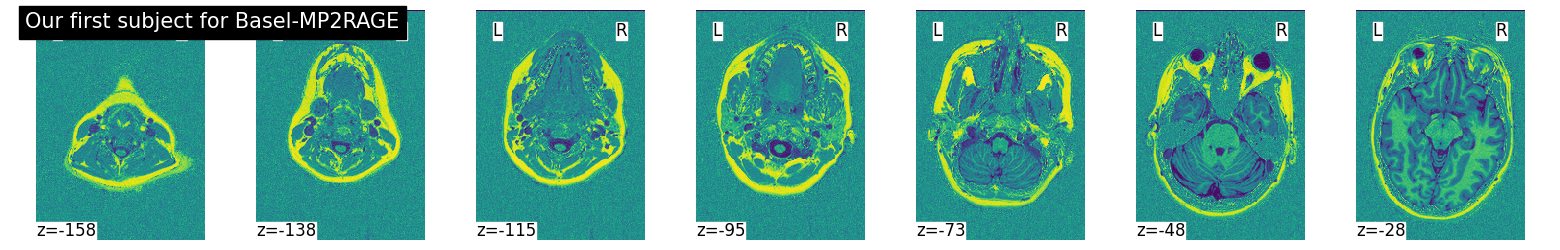

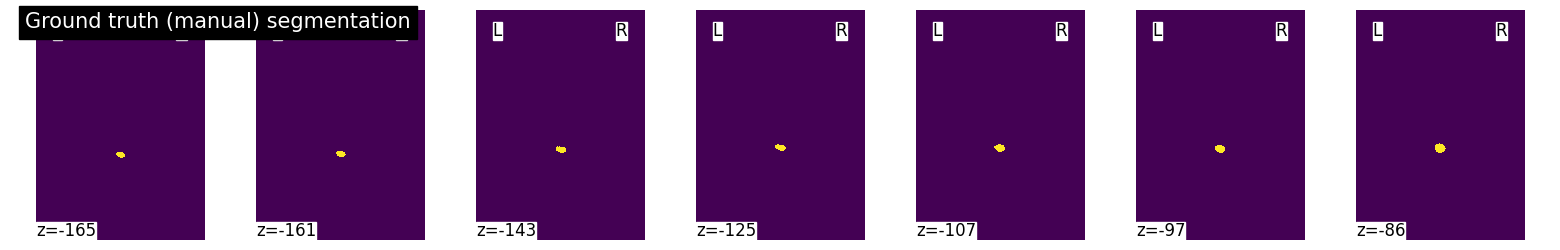

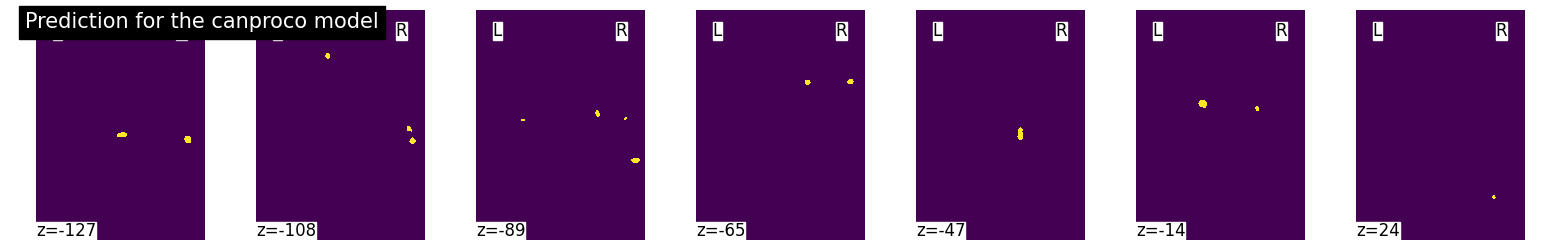

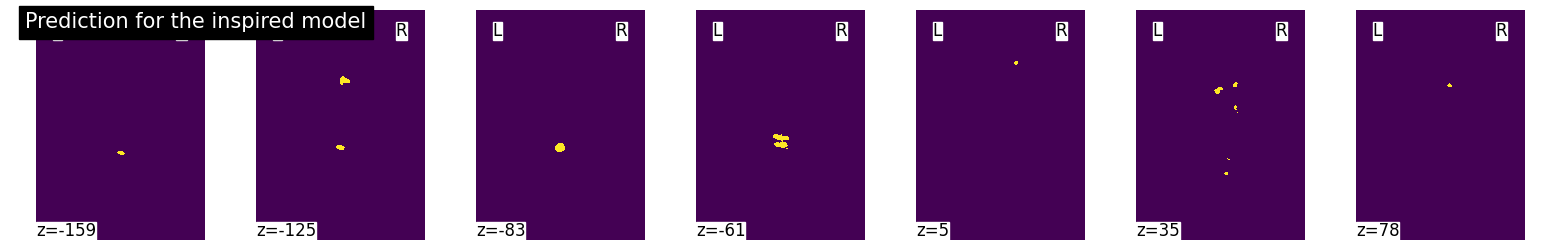

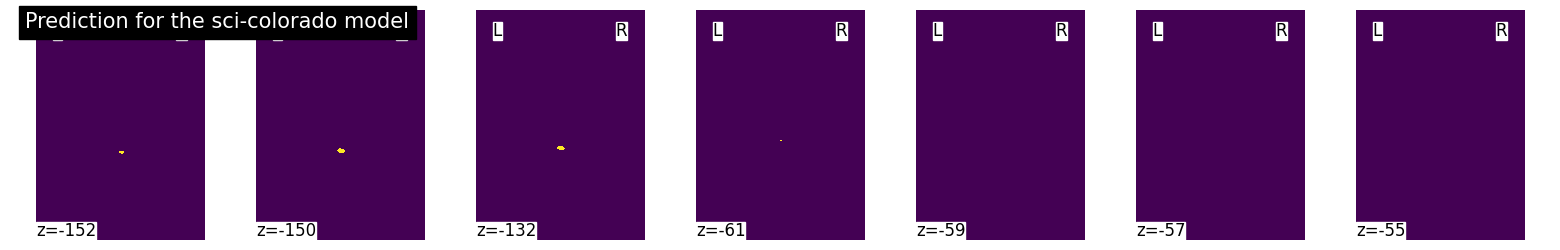

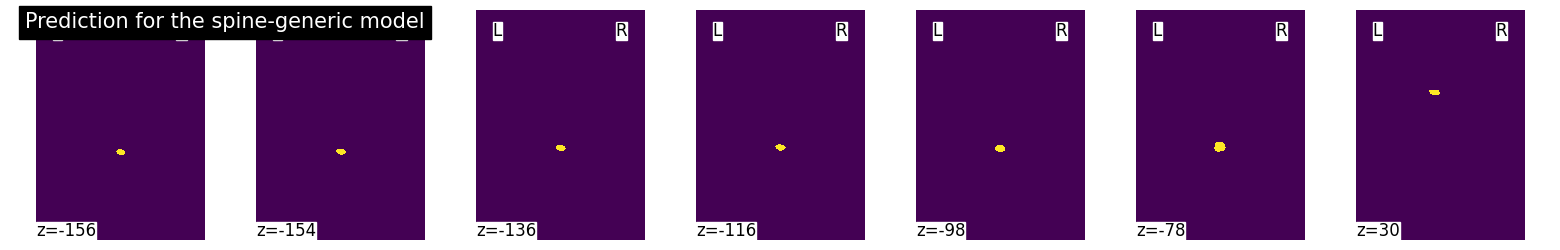

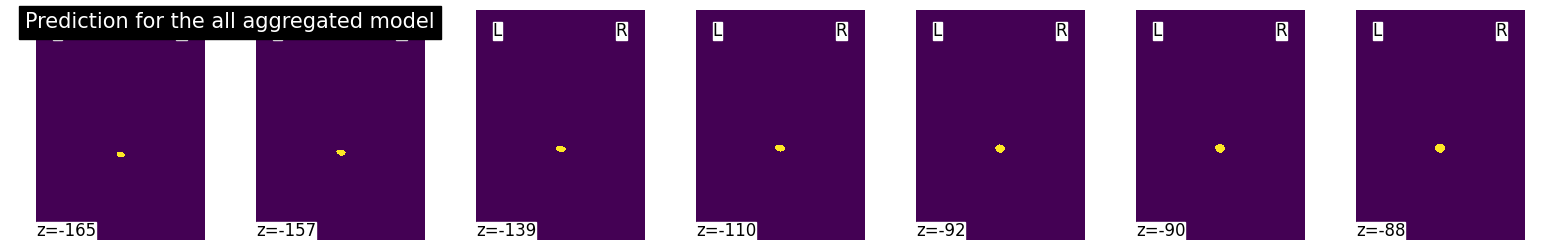

In [20]:
plotting.plot_img('data/basel_mp2rage_sub-P030-UNIT1_024_0000.nii.gz', display_mode='z', title='Our first subject for Basel-MP2RAGE')
plotting.plot_img('data/basel_mp2rage_sub-P030-UNIT1_024_manual-seg.nii.gz', display_mode='z', title='Ground truth (manual) segmentation')
plotting.plot_img('data/canproco_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the canproco model')
plotting.plot_img('data/inspired_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the inspired model')
plotting.plot_img('data/colorado_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the sci-colorado model')
plotting.plot_img('data/spine_generic_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the spine-generic model')
plotting.plot_img('data/all_aggregated_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the all aggregated model')

We can see how much better (visually) the all aggregated model is here.
And here are some more visual results in the form of gifs...

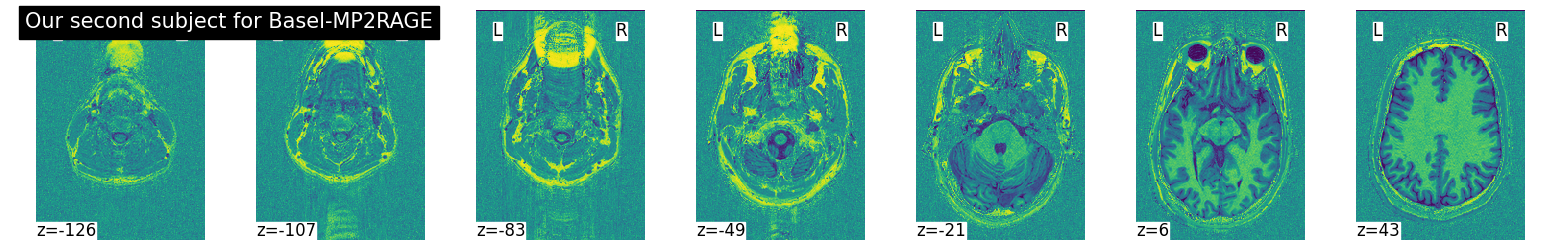

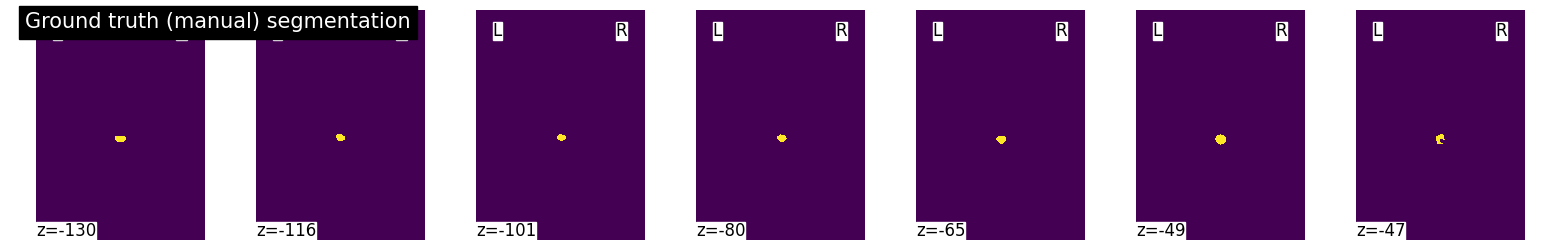

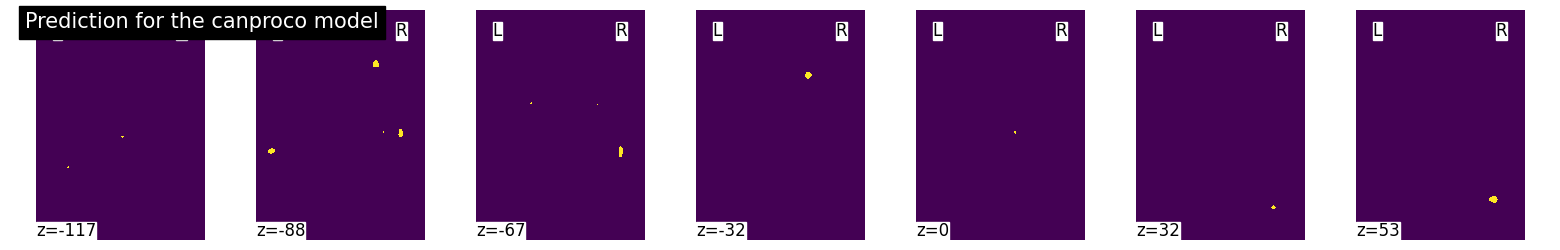

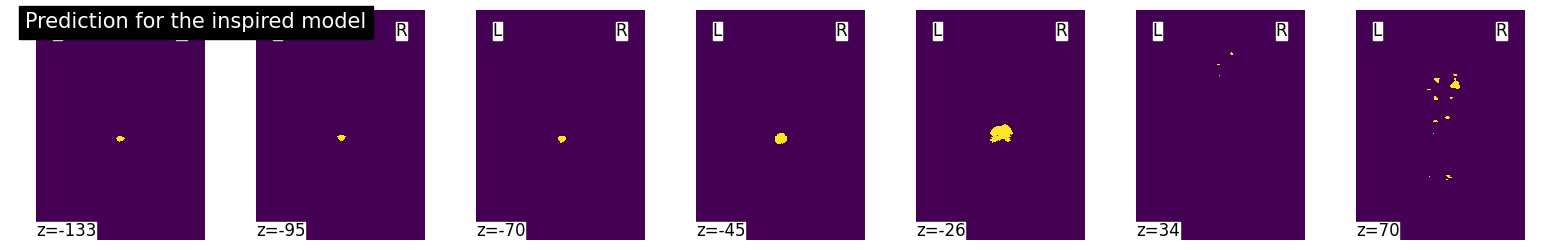

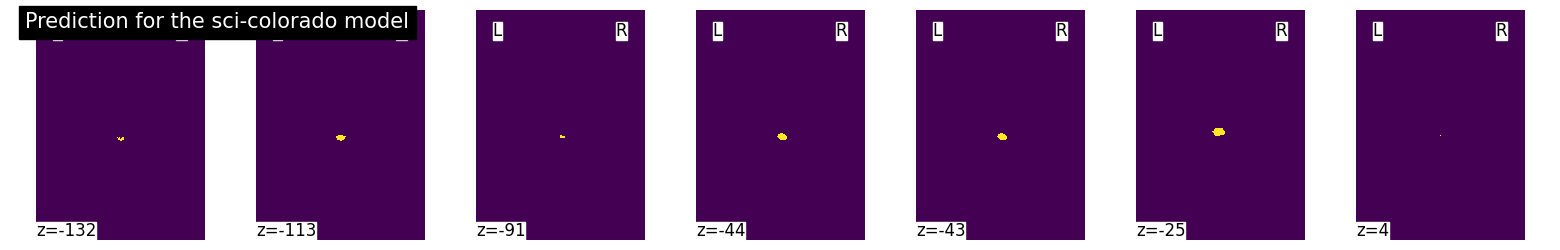

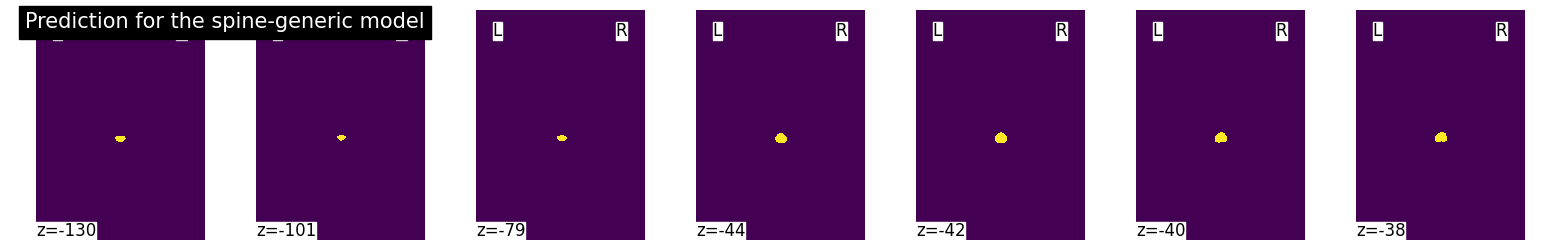

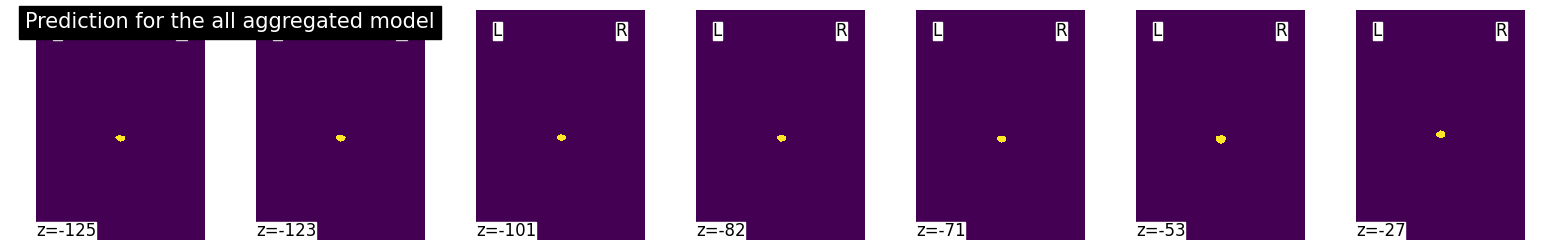

In [21]:
## Let's show another example...
plotting.plot_img('data/basel_mp2rage_sub-C024-UNIT1_001_0000.nii.gz', display_mode='z', title='Our second subject for Basel-MP2RAGE')
plotting.plot_img('data/basel_mp2rage_sub-C024-UNIT1_001_manual-seg.nii.gz', display_mode='z', title='Ground truth (manual) segmentation')
plotting.plot_img('data/canproco_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the canproco model')
plotting.plot_img('data/inspired_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the inspired model')
plotting.plot_img('data/colorado_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the sci-colorado model')
plotting.plot_img('data/spine_generic_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the spine-generic model')
plotting.plot_img('data/all_aggregated_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the all aggregated model')

We can see how the last row for both individuals look much better compared with the other specific models, showing model's capacity to better understand images of unseen contrasts.

### Let's have a look at an indivial of our second unseed dataset, our fMRI EPI images with the BOLD contrast:

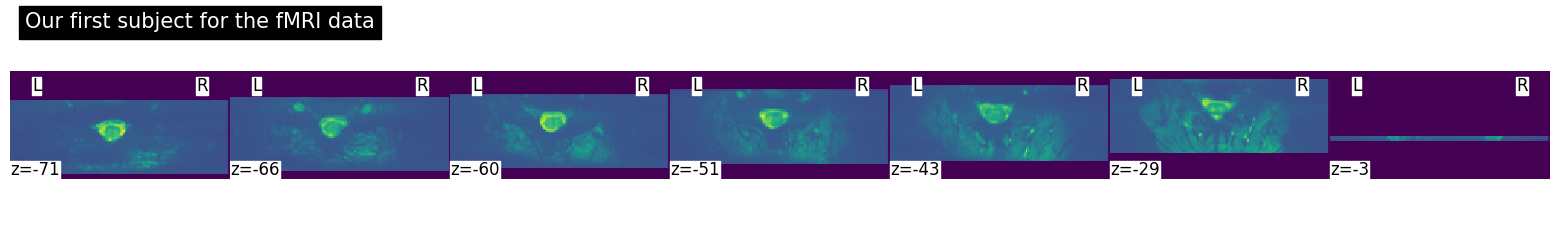

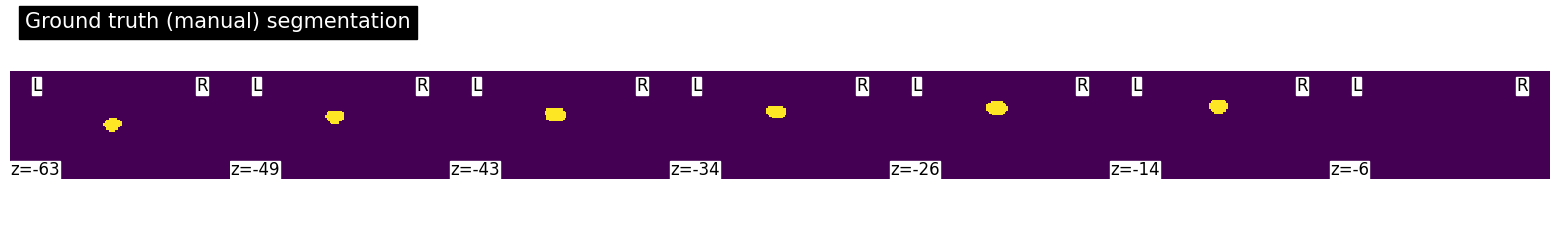

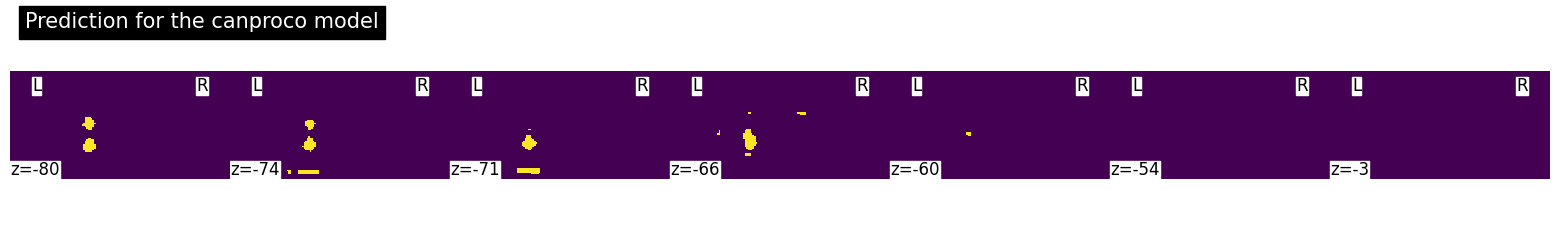

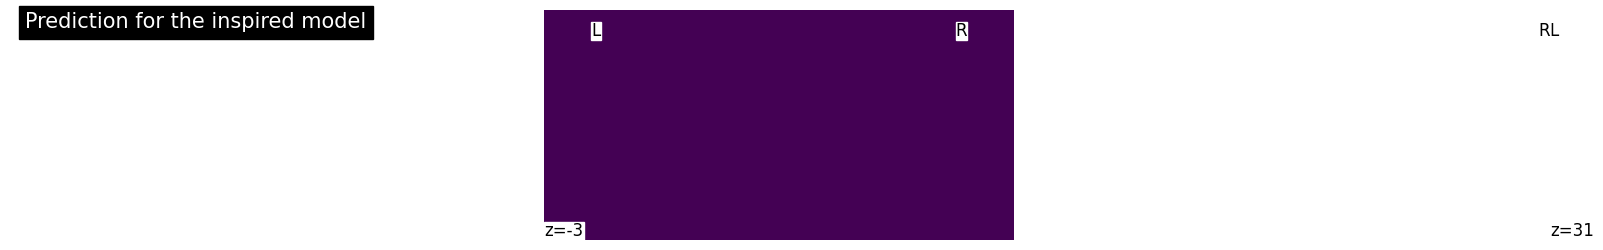

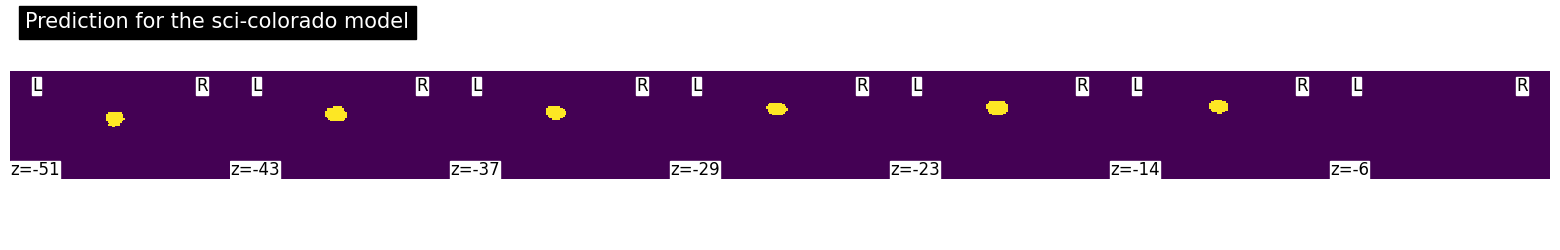

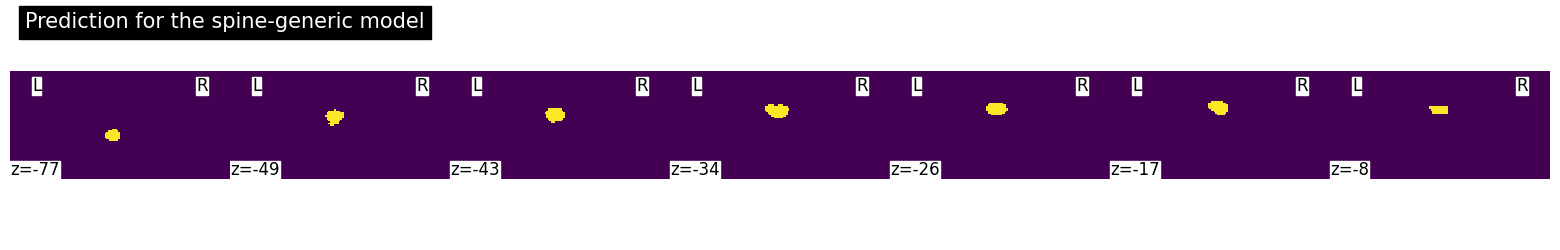

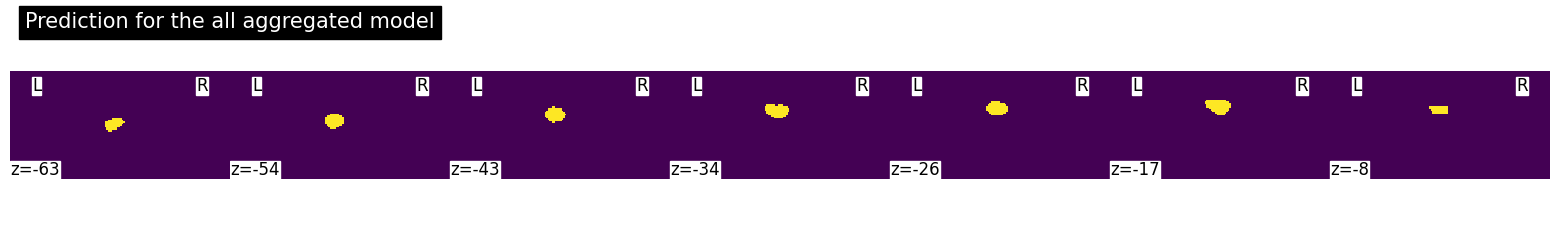

In [22]:
plotting.plot_img('data/fmri_sc_seg_leipzig-rest-all_003_0000.nii.gz', display_mode='z', title='Our first subject for the fMRI data')
plotting.plot_img('data/fmri_sc_seg_leipzig-rest-all_003_manual-seg.nii.gz', display_mode='z', title='Ground truth (manual) segmentation')
plotting.plot_img('data/canproco_fmri_sc_seg_leipzig-rest-all_003.nii.gz', display_mode='z', title='Prediction for the canproco model')
plotting.plot_img('data/inspired_fmri_sc_seg_leipzig-rest-all_003.nii.gz', display_mode='z', title='Prediction for the inspired model')
plotting.plot_img('data/colorado_fmri_sc_seg_leipzig-rest-all_003.nii.gz', display_mode='z', title='Prediction for the sci-colorado model')
plotting.plot_img('data/spine_generic_fmri_sc_seg_leipzig-rest-all_003.nii.gz', display_mode='z', title='Prediction for the spine-generic model')
plotting.plot_img('data/all_aggregated_fmri_sc_seg_leipzig-rest-all_003.nii.gz', display_mode='z', title='Prediction for the all aggregated model')

Et voilà!

Of course, you are free to visualize more images and look at them in fsleyes or another software for a better comparison. But I believe the initial experience is a success and I am excited to better train the "all aggregated" model as the time was limited for this course and have even better results. I see lots of potential aggregating various different datasets into one model.

The results are definitely not perfect as we can see with the fMRI data even though the dice is high. Still, it is great to see that for the Basel dataset, visual results are an amazing improvement.

## Results explanation

I wanted to take the time to explain the success, failure and limitations of this project.

The success

The success is definitely caused by using larger amount of data. What is interesting is that using larger amounts of data sometimes helps the model on the specific dataset like Canproco for example here our all aggregated model had better performances than the specific Canproco model. 
The all aggregated model is also able to generalize better. This is thanks to seeing various contrasts during training which grows the training distribution of the images. Since this distribution is larger, an unseen image has more chances of being part of it, or closer to it. I do not believe the model is able to generalize outside of the distribution it has seen efficiently, like humans do, but it is still amazing that the model is able to perform similarly on all datasets as well as performing much better on unseen data.

The failure

I think one of the explanation of the "poor" performances on specific dataset is that the model didn't have time to converge properly compared to specific models even with more epochs, and since the time was limited for this project, I could not manage to train it further. We can see how the measured Dice is still improving in the image below of the training process whereas it had plateaued for all specific models. In this image, we see the Dice still going up and not having reached a plateau at its last 1600 epoch, which is not optimal when training a deep learning model.

Limitations

The first clear limitation of this project is that nnunet adapts the model to the dataset it is being trained on, creating a smaller model for a smaller dataset, larger for a larger one. Thus, a smaller model will probably not generalize nearly as well as a bigger one. An interesting altenarives could of been to augment the data respectively of the size of the datasets to make them appear the same size and see the difference.

Another limitation is that, as mentioned, the aggregated datasets model didn't had time to fully converge, which surely hurts the results even though they are quite interesting and promising already.

A third limitation is the difference in the size of the various datasets being used and compared here. Some have very few images with only a single contrast whereas spine generic, for instance, has over 200 subjects with 6 contrasts each. This is why the spine generic model is almost as good as the aggregated dataset one since it has the most data. Still, it is great to see that the aggregated dataset outperforms it most of the time (every time, other than on its own test set).

![Training process of the all aggregated model over 1600 epoch](data/training_progress_all_aggregated_1600e.png)